# Machine Learning Engine

## Install environment
If necessary, [a link for the installation on MacOS X](https://scikit-learn.org/stable/developers/advanced_installation.html)

## Loading dependencies and checking the version of SciKit-Learn

In [116]:
from sklearn import __version__
import sys, traceback

required_version = "0.22"
try:
    if (__version__ < required_version):
        raise Exception()
except Exception:
    print("***")
    print("*** /!\\ scikit-learn >=", required_version, "required while", __version__, "found")
    print("***")
    sys.exit(1)

import pandas as pd
import numpy as np
np.random.seed(42)

## Loading in Dataset
**X** as independent variables and **y** as dependent variable

Data are fetched from [OpenML.org](https://www.openml.org/)

In [117]:
from sklearn.datasets import fetch_openml

# https://www.openml.org/d/40945
X, y = fetch_openml('titanic', version=1, return_X_y=True, as_frame=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = dataset.frame.drop('survived', axis=1)
# y = dataset.frame['survived']

# type of machine learning algorithm to use: 
# - 'classification'
# - 'regression'
# - 'clustering'
# - 'dimensionality-reduction'
ml_type = "classification"

# Preview of data
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3,B5,S,2,nan,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9,1.0,2.0,113781,151.6,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.6,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.6,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.6,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON"


## Remove useless data (optional)

In [119]:
#X = X.drop(columns=['name', 'cabin', 'body', 'home.dest'])

## Exploring data
### Statistical data

In [120]:
dataset = pd.concat([X, y], axis=1, sort=False)

pd.options.display.float_format = '{:.1f}'.format
#pd.reset_option('^display.', silent=True)

# percentile list 
perc =[.10, .50, .80, .95] 

# list of dtypes to include 
include =['object', 'float', 'int', 'category', np.number, np.object] 

dataset.describe(percentiles = perc, include = include)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,1309.0,1309,1309,1046.0,1309.0,1309.0,1309,1308.0,295,1307,486,121.0,745,1309
unique,nan,1307,2,nan,nan,nan,929,nan,186,3,27,nan,369,2
top,nan,"Kelly, Mr. James",male,nan,nan,nan,CA. 2343,nan,C23 C25 C27,S,13,nan,"New York, NY",0
freq,nan,2,843,nan,nan,nan,11,nan,6,914,39,nan,64,809
mean,2.3,NaN,NaN,29.9,0.5,0.4,NaN,33.3,NaN,NaN,NaN,160.8,NaN,NaN
std,0.8,NaN,NaN,14.4,1.0,0.9,NaN,51.8,NaN,NaN,NaN,97.7,NaN,NaN
min,1.0,NaN,NaN,0.2,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
10%,1.0,NaN,NaN,14.0,0.0,0.0,NaN,7.6,NaN,NaN,NaN,35.0,NaN,NaN
50%,3.0,NaN,NaN,28.0,0.0,0.0,NaN,14.5,NaN,NaN,NaN,155.0,NaN,NaN
80%,3.0,NaN,NaN,42.0,1.0,1.0,NaN,41.6,NaN,NaN,NaN,269.0,NaN,NaN


### Empty values

In [121]:
dataset.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

### Histogram

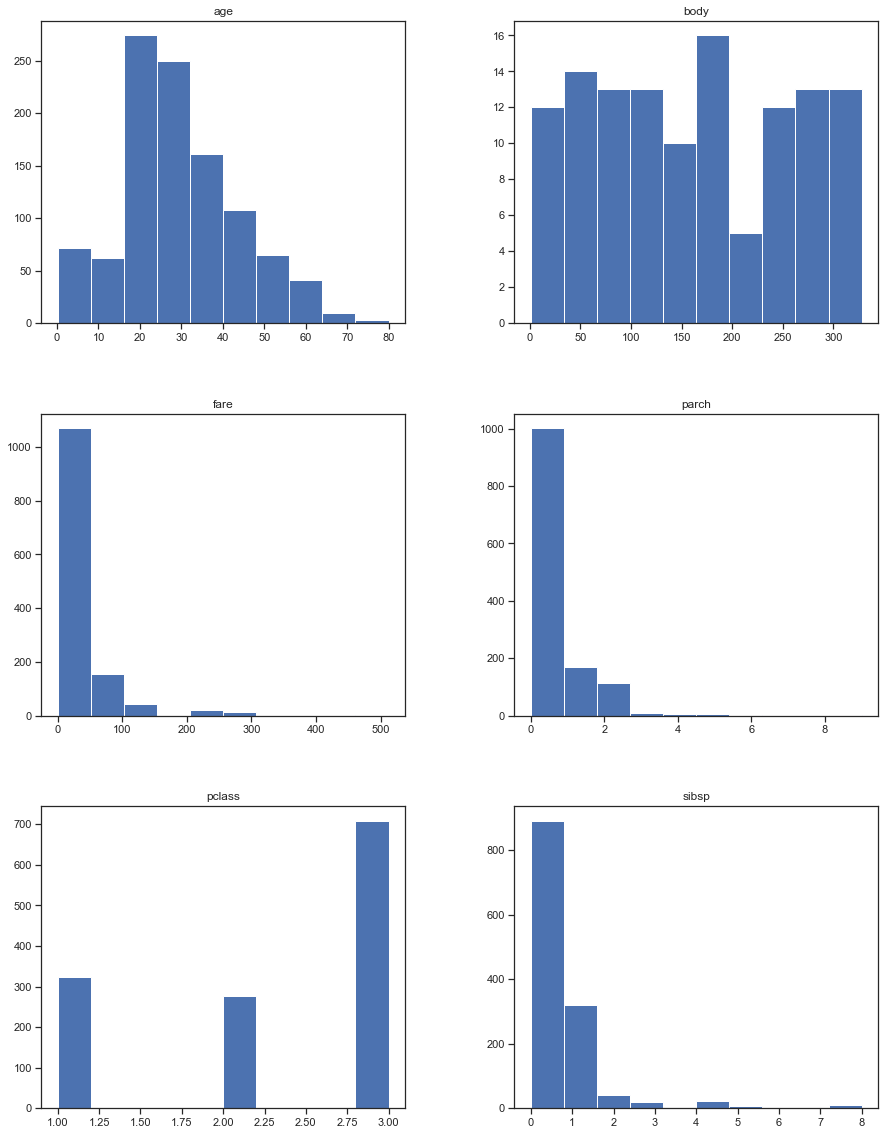

In [122]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = dataset.hist(bins=10, grid=False, ax=ax) 

### Heatmap

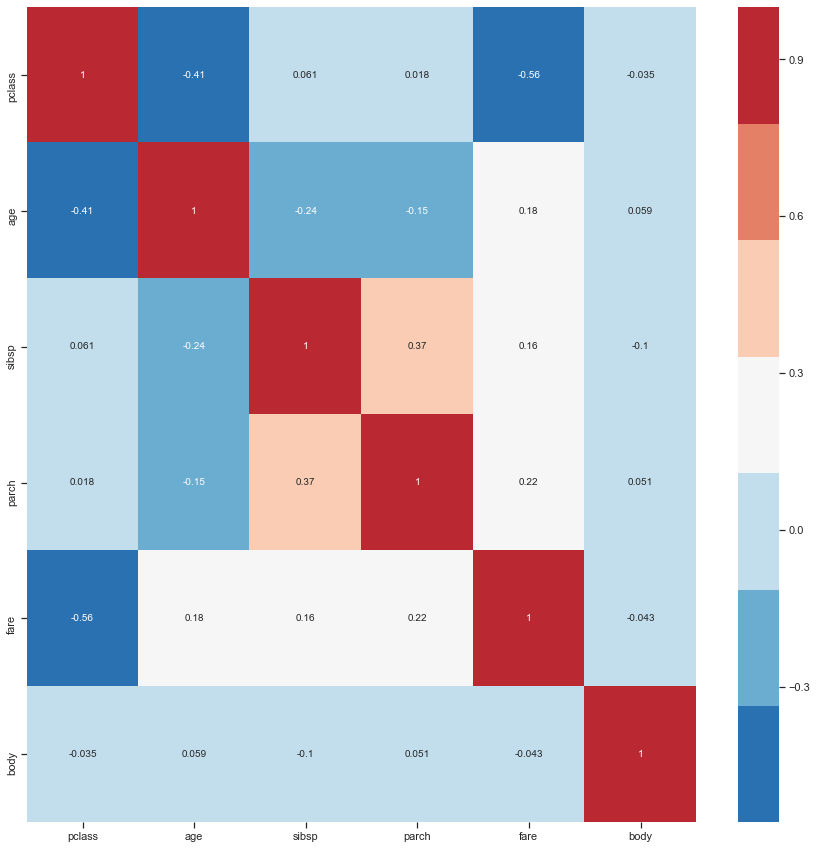

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

cmap = sns.color_palette("RdBu_r", 7)
# cmap = sns.color_palette("Blues")

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), cmap=cmap, annot=True, ax=ax)

We select the columns on which the pairplot drawing will be done

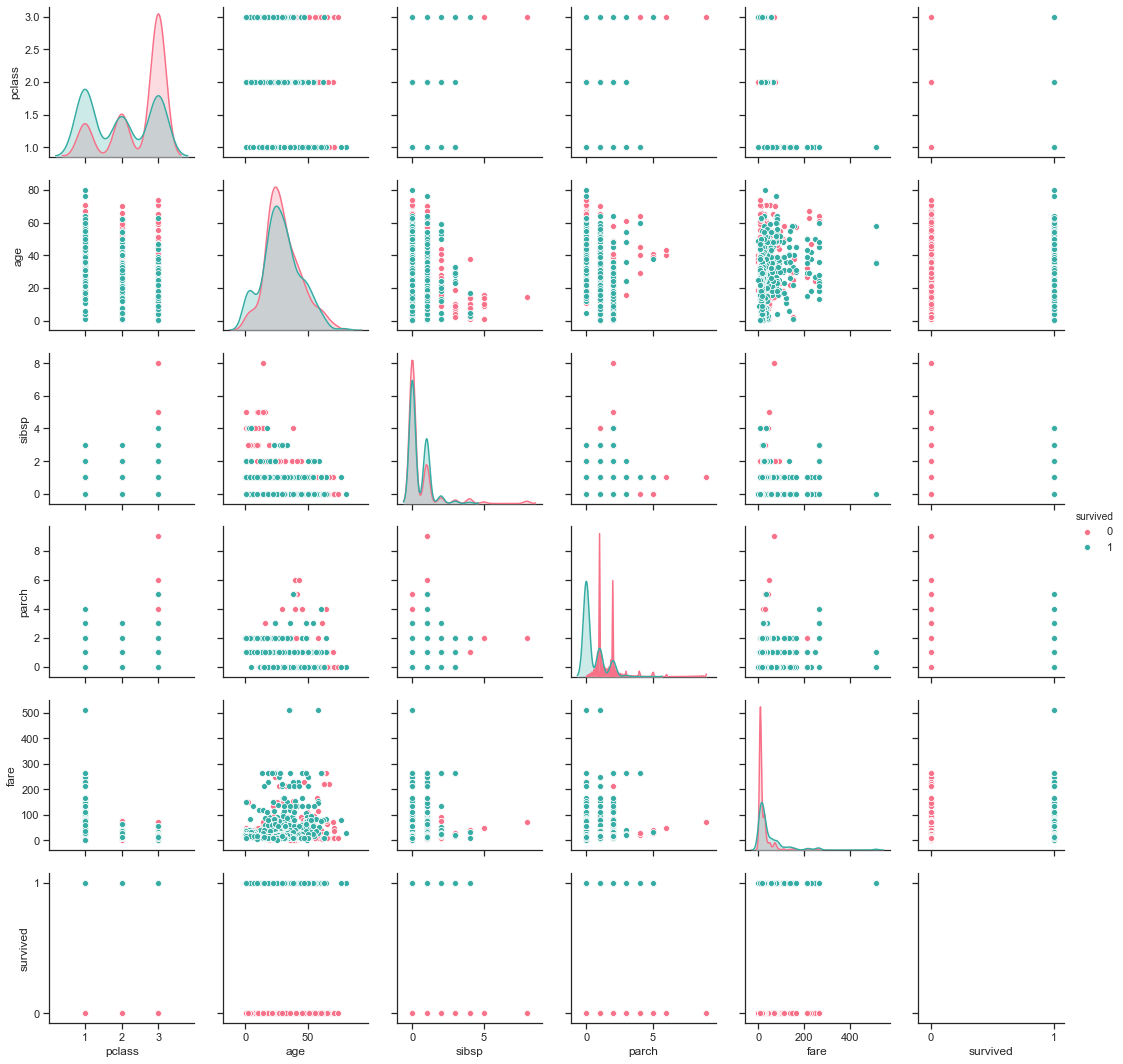

In [124]:
#X = dataset.drop(columns=['name', 'cabin', 'body', 'home.dest'])
dropped_cols = ['name', 'cabin', 'body', 'home.dest']
#pairplot_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset.drop(columns=dropped_cols), hue='survived', dropna='true', palette="husl", diag_kind="kde") #, vars=pairplot_cols) 

### Export to Excel (optional)

In [125]:
writer = pd.ExcelWriter('output.xlsx')  
dataset.to_excel(writer)  
writer.save()  
print('DataFrame is written successfully to the Excel File.')  

DataFrame is written successfully to the Excel File.


## Preprocessing

### Preparation for Imputing missing values, Standardizing Numeric Features and Encoding Categorical Features

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html?highlight=standardscaler

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [126]:
# We will train our classifier with the numeric and categorical features

# Numeric Features:
# - age: float.
# - fare: float.
from sklearn.impute import (
    SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.preprocessing import (
    StandardScaler, RobustScaler, MinMaxScaler, minmax_scale, 
    MaxAbsScaler, PowerTransformer, Normalizer)

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# We create the preprocessing pipelines for both numeric and categorical data.
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Execution of preprocessing
#### On *X* data

In [130]:
X_preprocessed = pd.DataFrame(data=preprocessor.fit_transform(X))

print(X_preprocessed.head())

     0   1   2   3   4   5   6   7   8   9  10
0  0.1 8.4 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0
1 -2.1 5.9 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0
2 -2.0 5.9 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0
3  0.2 5.9 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0
4 -0.2 5.9 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0


#### On *y* data

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_preprocessed = pd.DataFrame(le.fit_transform(y))

print(y_preprocessed.head())
#pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', model)])

   0
0  1
1  1
2  0
3  0
4  0


### Normalization

### Discretization

### Non-linear transformation

### Generating polynomial features

### Feature extraction

#### Text feature extraction

#### Feature hashing (FeatureHasher)

#### Loading features from dicts (DictVectorizer)

### Split between Train and Test dataset

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2)
print(X_train)

        0    1   2   3   4   5   6   7   8   9  10
772  -0.8 -0.3 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
543   0.6 -0.2 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0
289  -0.8  2.8 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0
10    1.5  9.1 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0
147   0.0  1.2 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0
...   ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
1095  0.0 -0.3 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
1130 -0.8 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
1294  0.0  0.1 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
860  -0.2 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
1126  0.0 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0

[1047 rows x 11 columns]


## Hyperparameter optimization across multiple models
### Definition of the helper

In [133]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=-1, verbose=1, scoring=None, refit=False): # n_jobs was 3
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
                        
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
#            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]


### Dictionary of models and dictionary of parameters for each model

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models1 = {
    'LogisticRegression': LogisticRegression(max_iter=400),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC()
}

params1 = {
    'LogisticRegression': [
        { 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C': [1, 2, 5, 7, 10]},
    ],
    'KNeighborsClassifier': { 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 50, 100, 250, 500]},
    'DecisionTreeClassifier': { 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']},
    'ExtraTreesClassifier': { 'n_estimators': [16, 32, 64] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32, 64], 'algorithm': ['SAMME', 'SAMME.R']},
    'GradientBoostingClassifier': { 'n_estimators': [16, 32, 64], 'learning_rate': [0.8, 1.0] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 64], 'criterion':  ['gini', 'entropy']},
    'GaussianNB': {},
    'SVC': [
        {'kernel': ['linear'], 'C': np.logspace(-3, 2, 6)}, # np.logspace(2.0, 3.0, num=5, dtype = int)
        {'kernel': ['poly'], 'C': np.logspace(-3, 2, 6)},
        {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6), 'gamma': [0.001, 0.0001]},
        {'kernel': ['sigmoid'], 'C': np.logspace(-3, 2, 6)}
    ]
}

### Estimator selection

In [135]:
X_train.shape
print(X_train.tail())

        0    1   2   3   4   5   6   7   8   9  10
1095  0.0 -0.3 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
1130 -0.8 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
1294  0.0  0.1 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
860  -0.2 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0
1126  0.0 -0.3 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0


In [136]:
y_train.shape
print(y_train.tail())

      0
1095  0
1130  0
1294  0
860   1
1126  0


In [20]:
from sklearn import metrics
#metrics.precision_score(X_train, y_train, pos_label=1)

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=2)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for KNeighborsClassifier.
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=2)]: Done   6 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GaussianNB.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for SVC.
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:   14.2s finished


## Visualize results

#### Top 20

In [49]:
mean_score = helper1.score_summary(sort_by='mean_score')
mean_score.head(5)

,estimator,min_score,mean_score,max_score,std_score,C,algorithm,criterion,gamma,kernel,leaf_size,learning_rate,n_estimators,penalty,solver,splitter
44,AdaBoostClassifier,0.7,0.7,0.7,0.0,NaN,SAMME,NaN,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN
18,LogisticRegression,0.7,0.7,0.8,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,sag,NaN
19,LogisticRegression,0.7,0.7,0.8,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,saga,NaN
17,LogisticRegression,0.7,0.7,0.8,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,lbfgs,NaN
16,LogisticRegression,0.7,0.7,0.8,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,newton-cg,NaN


In [50]:
max_score = helper1.score_summary(sort_by='max_score')
max_score.head(5)

,estimator,min_score,mean_score,max_score,std_score,C,algorithm,criterion,gamma,kernel,leaf_size,learning_rate,n_estimators,penalty,solver,splitter
60,GaussianNB,0.3,0.5,0.8,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,SVC,0.6,0.7,0.8,0.1,0.0,NaN,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,NaN
63,SVC,0.6,0.7,0.8,0.1,0.1,NaN,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,NaN
64,SVC,0.6,0.7,0.8,0.1,1.0,NaN,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,NaN
65,SVC,0.6,0.7,0.8,0.1,10.0,NaN,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,NaN


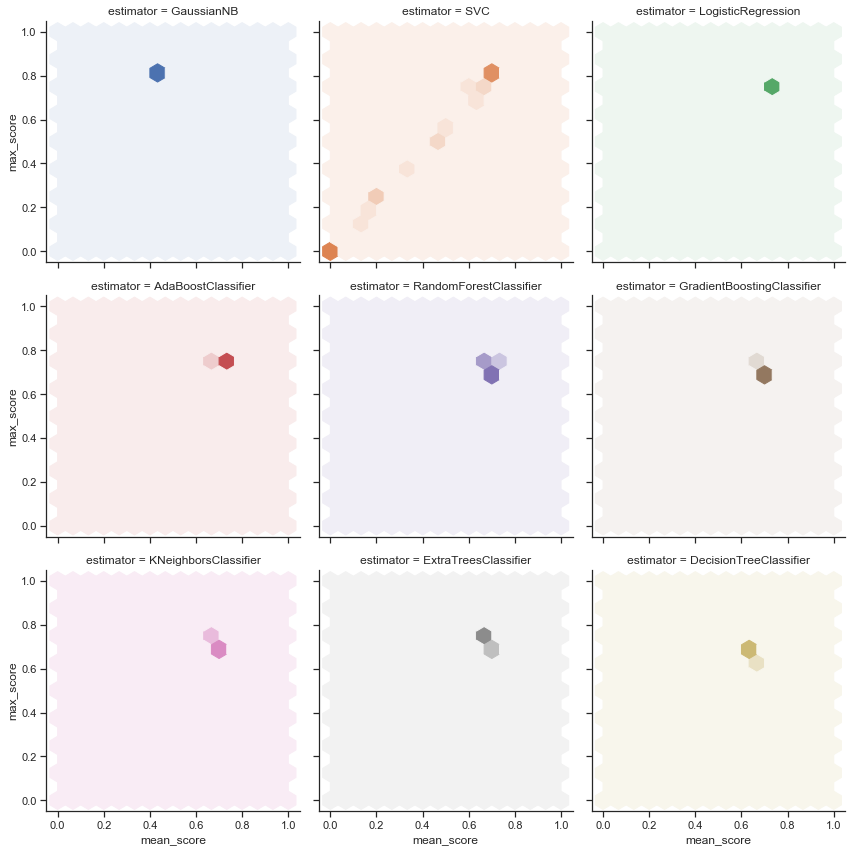

In [55]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
#with sns.axes_style("dark"):
g = sns.FacetGrid(max_score, hue="estimator", col="estimator", col_wrap=3, height=4)
g.map(hexbin, "mean_score", "max_score", extent=[0, 1, 0, 1]);

### Improve the preprocessing pipeline

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html?highlight=standardscaler#using-the-prediction-pipeline-in-a-grid-search

Different imputers:
https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html?highlight=imputer

Different scalers:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py